In [23]:

import os
from pathlib import Path

import numpy as np 
import pandas as pd 


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Lesson 5: Neural Nets from scratch! (Alternative title: always use a framework)

In lecture we went through an example of building a simple deep neural network from scratch, implemented a gradeint descent algorithm, and trained it on the *Titanic* dataset.

In this mini-project, I'll be building a more complicated, *Convolutional Neural Net* from scratch and training it to predict on the *MNIST Digit Recognizer* dataset.

First things first, let's have a look at the dataset. 

In [24]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There is a 'label' column with values 0-9, which makes perfect sense, since we are trying to classify handwritten digits.

The other columns (784 of them!) correspond to each of the pixel values in a 28x28 image.

In [25]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Rather than build a neural net with several dense layers like we did for the *Titanic* dataset, in this case it is probably best to examine a different layer architecture: *Convolutional Layers*. As we discussed in lesson 8 of the course, these layers are great at detecting image features, and do so by training filters to help detect certain smaller parts of a larger image. A convolutional layer is quite a bit more complicated to implement than a linear layer, so we may lean a bit on some libraries, but I wont' be using any pytorch layer wrappers, just a few helper functions.

We know that a convolutional layer is implemented such that it takes a certain number of input channels *X* and outputs another number of output channels *Y*. Each x,y combination has its own filter, such that each x filter for channel y sums to create each of Y output channels. The filters might look something like this:

In [26]:
class ConvolutionalLayer:
    def __init__(self, input_channels, output_channels, wr=3, wc=3):
        self.filters = np.random.uniform(low=-1.0, high=1.0, size=(input_channels, output_channels, wr, wc))
        self.window = (wr, wc)

c = ConvolutionalLayer(input_channels=1, output_channels=2)
c.filters

array([[[[ 0.40331131,  0.44882664,  0.68006847],
         [-0.35342137,  0.30003261, -0.79172984],
         [ 0.4896065 , -0.51897144,  0.22978575]],

        [[-0.78172223, -0.34980346, -0.93102324],
         [-0.65356316, -0.62429085, -0.66438088],
         [ 0.20144449, -0.5228546 ,  0.84500039]]]])

We would then apply the filter for x,y to each sliding window position. We can generate those like this:

In [27]:
import numpy.lib.stride_tricks as st
conv_in = [[1,0,1,0], [0,1,0,1], [1,0,1,0], [0,1,0,1]]
view = st.sliding_window_view(conv_in, (3,3))
view

array([[[[1, 0, 1],
         [0, 1, 0],
         [1, 0, 1]],

        [[0, 1, 0],
         [1, 0, 1],
         [0, 1, 0]]],


       [[[0, 1, 0],
         [1, 0, 1],
         [0, 1, 0]],

        [[1, 0, 1],
         [0, 1, 0],
         [1, 0, 1]]]])

We can then use element-wise multiplication to apply one of the filters to the sliding window:

In [28]:
single_filter_ewm = np.multiply(view, c.filters[0][0])
single_filter_ewm

array([[[[ 0.40331131,  0.        ,  0.68006847],
         [-0.        ,  0.30003261, -0.        ],
         [ 0.4896065 , -0.        ,  0.22978575]],

        [[ 0.        ,  0.44882664,  0.        ],
         [-0.35342137,  0.        , -0.79172984],
         [ 0.        , -0.51897144,  0.        ]]],


       [[[ 0.        ,  0.44882664,  0.        ],
         [-0.35342137,  0.        , -0.79172984],
         [ 0.        , -0.51897144,  0.        ]],

        [[ 0.40331131,  0.        ,  0.68006847],
         [-0.        ,  0.30003261, -0.        ],
         [ 0.4896065 , -0.        ,  0.22978575]]]])

And finally, sum up the results of the filter, such that a filter applied to a given subsection of x yields a single value. These new values will make up one of the output channels.

Notice that our output is not smaller than our input, depending on the implementation this does not always have to be the case. Because we do not consider partial sliding windows with *sliding_window_view()* (i.e. windows that partially extend beyond the bounds of our array), the resultant output is smaller than our input, which is ok!

In [29]:
summed = np.sum(single_filter_ewm, axis=(2,3))
summed

array([[ 2.10280464, -1.21529601],
       [-1.21529601,  2.10280464]])

You'd also normally see an activation function such as *ReLU* applied to the output before being propogated:

In [30]:
relu_summed = np.maximum(0, summed)
relu_summed

array([[2.10280464, 0.        ],
       [0.        , 2.10280464]])

So, putting together the cells above, the full convolutional layer might look something like this:

In [31]:
class ConvolutionalLayer:
    def __init__(self, in_channels, out_channels, wr=3, wc=3):
        self.filters = np.random.uniform(low=-1.0, high=1.0, size=(in_channels, out_channels, wr, wc))
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.window = (wr, wc)
        
    def forward(self, x):
        # this reduces input dimension size but it's probably ok (for this example)!
        wv = st.sliding_window_view(x, self.window)
        out = np.zeros(shape=(self.in_channels, self.out_channels, wv.shape[0], wv.shape[1]))
        for j in range(self.out_channels):
            for i in range(self.in_channels):
                out[i][j] += np.sum(np.multiply(wv, self.filters[i][j]), axis=(2, 3))
        return np.maximum(0, out)

cl = ConvolutionalLayer(1, 2)
cl.filters[0][0].fill(1)
cl.filters[0][1].fill(0.5)
cl.forward(np.ones(16).reshape(4,4))

array([[[[9. , 9. ],
         [9. , 9. ]],

        [[4.5, 4.5],
         [4.5, 4.5]]]])

However, in order to propogate gradients and train a model (we *won't* be implementing that ourselves today), we'll need to use *pytorch* instead of numpy. 

I've implemented that below. There isn't a fantastic way to implement a vectorized solution to convolutions in pure python without severely breaking gradient propogation (at least as far as I tried, I spent hours on this). The underlying convolution code that pytorch uses for *Conv2d* is actually written in C, so instead we're going to use a nifty trick that I found in the PyTorch docs utilizing *unfold* and *fold* to produce the same result, albeit much less efficiently. (last example on this page https://pytorch.org/docs/stable/generated/torch.nn.Unfold.html)

Notice I've also implemented a function *adjust_weights* that we'll use for updating the filter values during gradient descent. We'll come back to that later.

We can run a simple test, if we pass a bunch of ones into the layer we should receive *S* identical outputs, where *S* is the number of inputs we passed in (in this case 3).

In [32]:
import torch 

class ConvolutionalLayer:
    def __init__(self, in_channels, out_channels, wr=3, wc=3, activation = torch.relu):
        self.filters = torch.nn.Parameter(-2 * torch.rand(out_channels, in_channels, wr, wc) + 1, requires_grad=True)
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.window = (wr, wc)
        self.activation = activation
        
        
    def forward(self, x):
        steps_r, steps_c = x.shape[2] - self.window[0] + 1, x.shape[3] - self.window[1] + 1
        inp_unf = torch.nn.functional.unfold(x, self.window)
        out_unf = inp_unf.transpose(1,2).matmul(self.filters.view(self.filters.size(0), -1).t()).transpose(1, 2)
        out = torch.nn.functional.fold(out_unf, (steps_r, steps_c), (1,1))
        return self.activation(out)
    
    def adjust_weights(self, lr):
        self.filters.sub_(self.filters.grad * lr)
        self.filters.grad.zero_()

cl = ConvolutionalLayer(2, 2)
cl.forward(torch.ones(3,2,4,4))

tensor([[[[1.6522, 1.6522],
          [1.6522, 1.6522]],

         [[2.8835, 2.8835],
          [2.8835, 2.8835]]],


        [[[1.6522, 1.6522],
          [1.6522, 1.6522]],

         [[2.8835, 2.8835],
          [2.8835, 2.8835]]],


        [[[1.6522, 1.6522],
          [1.6522, 1.6522]],

         [[2.8835, 2.8835],
          [2.8835, 2.8835]]]], grad_fn=<ReluBackward0>)

While we'd like to compose most of our network from these convolutional layers, we'll also need a layer to produce our classifications. Since we'd like to distinguish between 0-9 digits, a linear layer with 10 outputs would be perfect.

Similar to how we did it in lecture, let's implement a fully-connected dense layer, as well as an *adjust_weights* function to update it's weight and bias parameters.

In [33]:
class DenseLayer:
    def __init__(self, in_channels, out_channels, activation=torch.relu):
        self.weights = torch.nn.Parameter(-2 * torch.rand(in_channels, out_channels) + 1, requires_grad=True)
        self.bias = torch.nn.Parameter(torch.rand(out_channels), requires_grad=True)
        self.activation = activation
        
    def forward(self, x):
        x = torch.flatten(x, start_dim=1, end_dim=-1)
        return self.activation(x@self.weights + self.bias)
    
    def adjust_weights(self, lr):
        self.weights.sub_(self.weights.grad * lr)
        self.weights.grad.zero_()
        self.bias.sub_(self.bias.grad * lr)
        self.bias.grad.zero_()


ll = DenseLayer(10, 2)
ll.forward(torch.ones(3,10))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<ReluBackward0>)

Next, we can write a class for a simple sequential neural network. This network simply propogates output from one layer to the next, in order. I've also implemented a function to call each layer's *adjust_weights* function.

In [34]:
class SeqNeuralNetFromScratch:
    def __init__(self, layers):
        self.layers = layers
        
    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def adjust_weights(self, lr):
        with torch.no_grad():
            for layer in self.layers:
                layer.adjust_weights(lr)

Let's put it all together for a quick test with some dummy data.

Note that I also hid a *flatten* operation in the dense layer implementation. This flattens the outputs for each sample from the previous sample from 4 dimensions down to 2.

In [35]:
nn = SeqNeuralNetFromScratch([
    ConvolutionalLayer(1, 7, activation=torch.relu), 
    ConvolutionalLayer(7, 5, activation=torch.relu),
    ConvolutionalLayer(5, 3, activation=torch.relu),
    DenseLayer(3*14*14, 10, activation=torch.sigmoid)
])
result = nn.forward(torch.rand(2, 1, 20, 20))

torch.softmax(result, dim=1)


tensor([[0.0598, 0.0598, 0.0733, 0.0598, 0.1403, 0.1626, 0.0598, 0.0598, 0.1623,
         0.1626],
        [0.0609, 0.0609, 0.1383, 0.1655, 0.0609, 0.1655, 0.0609, 0.0609, 0.0609,
         0.1655]], grad_fn=<SoftmaxBackward0>)

We can apply a softmax function to the final result to produce probabilities for each digit.

Next let's get back to the *Digit Recognizer* dataset.

We'll need to seperate the inputs and labels, as well as transform the input data such that it's in two dimensions rather than one like our convolutional layers require. At this point I also normalize the input values to be between 0 and 1 out of habit.

The dataset contains 42000 images, so we'll put 37000 of those in the training set and set 5 of them aside for validation.

In [36]:
inputs = torch.unsqueeze(torch.reshape(torch.tensor(df[df.columns[1:]].values), (42000, 28, 28)), 1)
labels = torch.tensor(df['label'].values)
inputs = inputs / 255

train_inputs, valid_inputs = torch.split(inputs, [37000, 5000])
train_labels, valid_labels = torch.split(labels, [37000, 5000])



Next, we set our hyperparameters and construct the network we'll be training. I did extensieve testing of different architectures and different hyperparemeters, and these gave me my best results by far. (Training this model is a little finnicky, given we are not using any of PyTorch's optimizers or other niceties).

I settled on 3 convolutional layers followed by a single dense layer with 10 outputs in order to classify images as digits 0-9. 

*1452* is the size of the output from the previous convolutional layer after it is flattened. You could calculate this number by hand, but it's just as easy to look at the error message to see the size mismatch and copy the value you need.

In [37]:
NUM_EPOCHS = 12
LEARNING_RATE = 0.105
BATCH_SIZE = 20
nn = SeqNeuralNetFromScratch([
    ConvolutionalLayer(1, 9, activation=torch.relu), 
    ConvolutionalLayer(9, 5, activation=torch.relu),
    ConvolutionalLayer(5, 3, activation=torch.relu),
    DenseLayer(1452, 10, activation=lambda x: x)
])

Finally, we'll need to implement a training loop. 

I've chosen to use CrossEntropyLoss for our loss function, as it is one of the go-to metrics for multi-class classification problems such as this one. This loss function has softmax built-in, which is why we leave the last layer's activation as the identity function.

We pass data into our model in batches, and then calculate loss, propogate gradients, and call our *adjust_weights* function for each batch. We also keep track of running loss and accuracy for our training and validation sets across different epochs.

In [38]:
cross_entropy_loss = torch.nn.CrossEntropyLoss()

input_batches = torch.split(train_inputs, BATCH_SIZE)
label_batches = torch.split(train_labels, BATCH_SIZE)

v_input_batches = torch.split(valid_inputs, BATCH_SIZE)
v_label_batches = torch.split(valid_labels, BATCH_SIZE)

training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    running_accuracy = 0.0
    for batch_num, (i, l) in enumerate(zip(input_batches, label_batches)):
        i.requires_grad_ = True
        out = nn.forward(i)
        loss = cross_entropy_loss(out, l)
        loss.backward()
        nn.adjust_weights(LEARNING_RATE)
        running_loss += loss.item()
        
        preds = torch.argmax(out, 1)
        running_accuracy += (preds == l).float().sum().item() / BATCH_SIZE
        
    training_losses.append(running_loss / len(input_batches))
    training_accuracies.append(running_accuracy / len(input_batches))
    
    running_loss = 0.0
    running_accuracy = 0.0
    for batch_num, (i, l) in enumerate(zip(v_input_batches, v_label_batches)):
        with torch.no_grad():
            out = nn.forward(i)
            loss = cross_entropy_loss(out, l)
            running_loss += loss.item()
            preds = torch.argmax(out, 1)
            running_accuracy += (preds == l).float().sum().item() / BATCH_SIZE
            
    validation_losses.append(running_loss / len(v_input_batches))
    validation_accuracies.append(running_accuracy / len(v_input_batches))

After much tuning and many models that did not converge at all, I achieved this *spectacular* result! I jumped out of my chair after seeing endless zig-zaggy loss plots.

Text(0.5, 1.0, 'Accuracy')

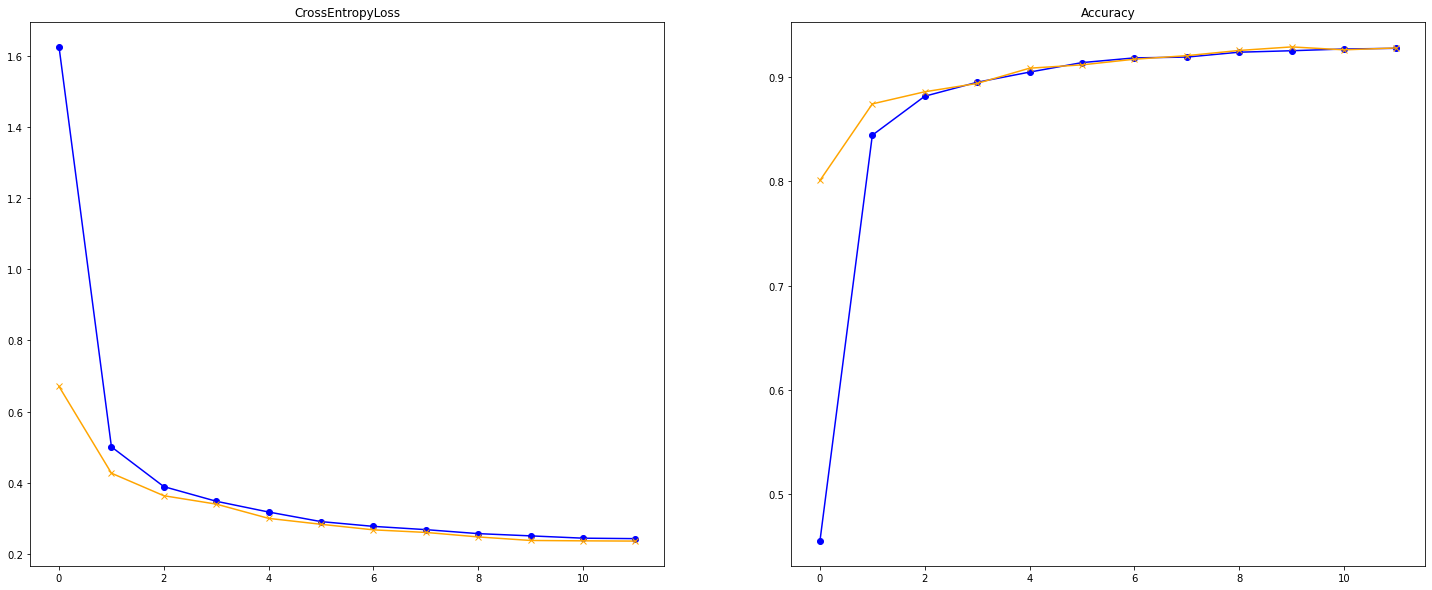

In [39]:

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
e = np.arange(NUM_EPOCHS)

ax1.plot(e, training_losses, color='blue', marker='o', label='train')
ax1.plot(e, validation_losses, color='orange', marker='x', label='validation')
ax1.set_title('CrossEntropyLoss')

ax2.plot(e, training_accuracies, color='blue', marker='o', label='train')
ax2.plot(e, validation_accuracies, color='orange', marker='x', label='validation')
ax2.set_title('Accuracy')
    

In [40]:
validation_losses[-1], validation_accuracies[-1]

(0.23587821543216705, 0.9277999999999988)

Our model achieved 93% accuracy on the validation set after our final epoch, which is a satisfying score to achieve considering we only somewhat relied on advanced ML libraries. There are so many vectors for improvement though... from pooling techniques to dropout layers, to a more sophisticated optimizer. 

Anyhow, let's pull in the test set so that we can make a submission to the contest.

In [41]:
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
inputs = torch.unsqueeze(torch.reshape(torch.tensor(test_df[test_df.columns].values), (28000, 28, 28)), 1)
inputs = inputs / 255

input_batches = torch.split(inputs, BATCH_SIZE)

prediction_batches = []
for batch in input_batches:
    with torch.no_grad():
        prediction_batches.append(nn.forward(batch))



In [42]:
prediction_tensors = torch.cat(prediction_batches)
predictions = torch.argmax(prediction_tensors, 1)

In [43]:
submission_df = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': predictions.detach().numpy()})
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [44]:
submission_df.to_csv('submission.csv', index=False)

We acheivied 90% accuracy for this submission, which is a great result. We could certianly continue to improve it by continuing to tune our model and perhaps implementing pooling and dropout layers. However, for this mini-project our goal was to implement a CNN end-to-end, which we have done. 

The other point was to illustrate why we use frameworks at all. This notebook took me quite a while, between trying to get convolution dimensions right to debugging why certain gradients weren't propogating, this took me many hours. All for something less effective than a model built using PyTorch's built-in layer implementation and optimizer implementations. Utilizing the full power of PyTorch, I can code up an identical model in about 30 seconds:

In [45]:
class SeqCNN(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Conv2d(1, 9, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(9, 5, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(5, 3, 3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Flatten(),
            torch.nn.Linear(3*28*28, 10)
        )

    def forward(self, x):
        return self.layers(x)

cnn = SeqCNN()
cnn(input_batches[0])

tensor([[ 0.0219, -0.0101, -0.0316, -0.0046,  0.0254, -0.0015,  0.0181,  0.0018,
          0.0231,  0.0154],
        [ 0.0283, -0.0067, -0.0279, -0.0092,  0.0221, -0.0045,  0.0158,  0.0041,
          0.0267,  0.0141],
        [ 0.0200, -0.0121, -0.0273, -0.0028,  0.0269, -0.0052,  0.0210,  0.0028,
          0.0237,  0.0089],
        [ 0.0216, -0.0119, -0.0319, -0.0084,  0.0205, -0.0059,  0.0188,  0.0059,
          0.0235,  0.0111],
        [ 0.0272, -0.0057, -0.0351, -0.0079,  0.0228, -0.0026,  0.0224,  0.0031,
          0.0217,  0.0174],
        [ 0.0265, -0.0073, -0.0266, -0.0029,  0.0283, -0.0014,  0.0229,  0.0067,
          0.0223,  0.0169],
        [ 0.0203, -0.0147, -0.0283, -0.0088,  0.0221, -0.0071,  0.0115,  0.0034,
          0.0253,  0.0087],
        [ 0.0208, -0.0089, -0.0279, -0.0038,  0.0212, -0.0061,  0.0147,  0.0049,
          0.0229,  0.0061],
        [ 0.0224, -0.0104, -0.0334, -0.0148,  0.0260, -0.0061,  0.0094,  0.0033,
          0.0273,  0.0059],
        [ 0.0233, -

Sometimes the best way to understand things is to implement them yourself, so this was hardly a useless exercise. Struggling with the vectorized convolution implementation has made me realize it would be good to have a refresher on ML math, so I might take https://www.deeplearning.ai/courses/mathematics-for-machine-learning-and-data-science-specialization/ next.

I learned a lot this lesson, and it was so satisfying to watch my implementation achieve decent results. That's all for this week!